# Duany Espíndola

### minhas descobertas

- Após descartar filmes com menos de 50 votos é possível observar que:
- - Apesar das notas médias mais proximas do valor 4 serem as que mais aparecem 
- - Apenas 20% das notas médias tem valor maior ou igual a 4
- - O gráfico de quantidade de notas é o típico gráfico "long tail", onde muitos filmes recebem poucos votos e a quantidade de filme que vai receber muitos votos vai caindo.
- - -  OU seja, a quantidade de filmes que realmente são 'block buster' e move fãs para votação é pequena em relação à quantidad de filmes lançados

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
'''
!pip install pandas=="0.24.0"  --quiet --user
!pip install seaborn=="0.9.0"  --quiet --user
!pip install scipy=="1.2.0"  --quiet --user
'''

'\n!pip install pandas=="0.24.0"  --quiet --user\n!pip install seaborn=="0.9.0"  --quiet --user\n!pip install scipy=="1.2.0"  --quiet --user\n'

In [2]:
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import shapiro

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)


Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('movies.csv', index_col="movieId")
filmes.index.names = ['filmeId']
colunas = ['titulo', 'generos']
filmes.columns = colunas

In [4]:
filmes.head(5)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('ratings.csv')
colunas = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.columns = colunas

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby(['filmeId']).mean()['nota']

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
filmes['total_de_votos'] =  notas.groupby(['filmeId']).count()['nota']


In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query('total_de_votos >=50')

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Nota média dos filmes')

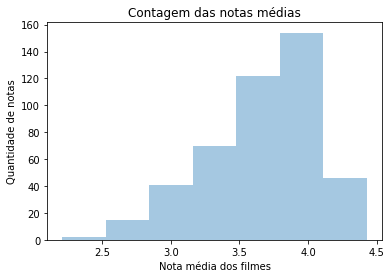

In [14]:
# histograma
grafico = sns.distplot(filmes['nota_media'], norm_hist=False, kde=False, bins=7)
grafico.set_title('Contagem das notas médias')
grafico.set_ylabel('Quantidade de notas')
grafico.set_xlabel('Nota média dos filmes')

Text(0.5, 0, 'nota média de todos os filmes')

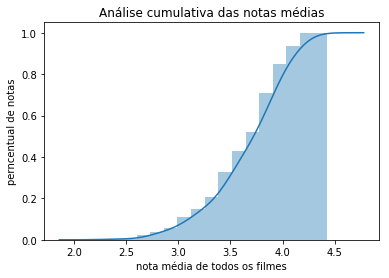

In [15]:
# solução histograma
grafico = sns.distplot(filmes['nota_media'], hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
grafico.set_title('Análise cumulativa das notas médias')
grafico.set_ylabel('perncentual de notas')
grafico.set_xlabel('nota média de todos os filmes')

- Pelo gráfico é possível obersar que quase 80% das notas médias são menores que 4
- e que não exitem notas médias maiores que 4,5

In [16]:
filmes['nota_media'].describe()

count    450.000000
mean       3.662909
std        0.383324
min        2.207547
25%        3.440433
50%        3.754464
75%        3.943634
max        4.429022
Name: nota_media, dtype: float64

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Quantidade de votos')

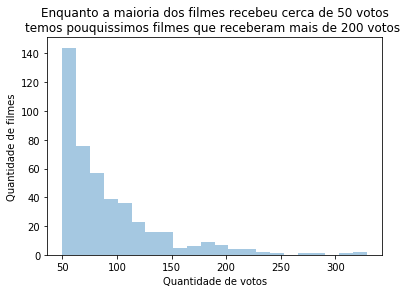

In [17]:
# solução histograma
# histograma
grafico = sns.distplot(filmes['total_de_votos'], norm_hist=False, kde=False)
grafico.set_title('Enquanto a maioria dos filmes recebeu cerca de 50 votos\n'+
                  'temos pouquissimos filmes que receberam mais de 200 votos ')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Quantidade de votos')

Text(0.5, 0, 'quantidad de votos que o filme recebeu')

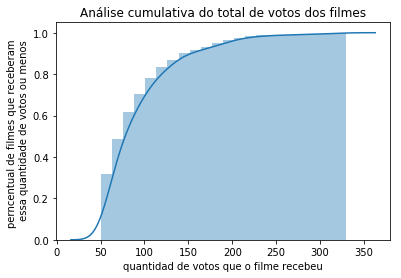

In [18]:
# solução cumulativa
grafico = sns.distplot(filmes['total_de_votos'], hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
grafico.set_title('Análise cumulativa do total de votos dos filmes')
grafico.set_ylabel('perncentual de filmes que receberam \n essa quantidade de votos ou menos')
grafico.set_xlabel('quantidad de votos que o filme recebeu')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [19]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)

In [20]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [21]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [22]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 0, 'Gêneros dos filmes')

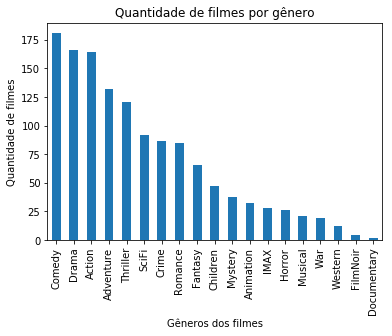

In [23]:
grafico = generos.sum().sort_values(ascending=False).plot.bar()

grafico.set_title('Quantidade de filmes por gênero')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Gêneros dos filmes')


## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [24]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False).head(5)

In [25]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [26]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [27]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

Text(0, 0.5, 'Quantidade de votos')

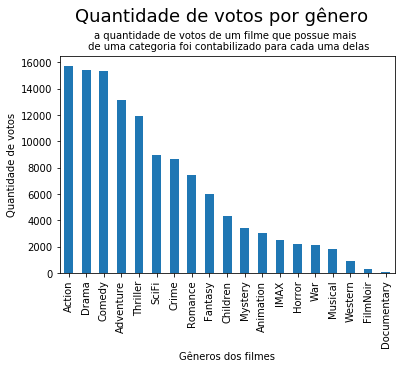

In [28]:
# solução
import matplotlib.pyplot as plt
plt.figure()
votos_por_genero_por_filme.sum().sort_values(ascending=False).plot.bar()
plt.suptitle('Quantidade de votos por gênero', y=1.05, fontsize=18)
plt.title('a quantidade de votos de um filme que possue mais \n de uma categoria foi contabilizado para cada uma delas', fontsize=10)
plt.xlabel('Gêneros dos filmes')
plt.ylabel('Quantidade de votos')

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [29]:
# solucao código
#filmes_por_genero = pd.DataFrame(generos.sum().sort_values(ascending=False))

filmes_por_genero = generos.sum().sort_values(ascending=False)
votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending=False)

popularidade_por_genero = (votos_por_genero / filmes_por_genero).sort_values(ascending=False)

popularidade_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0, 0.5, 'Quantidade média de votos')

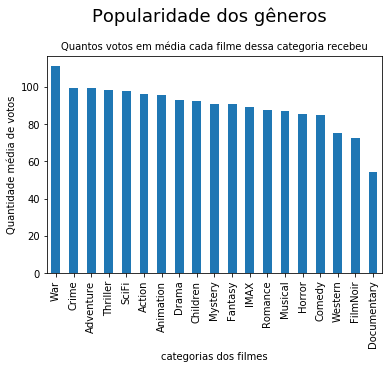

In [30]:
# solução com visualização 
plt.figure()
popularidade_por_genero.plot.bar()
plt.suptitle('Popularidade dos gêneros', y=1.05, fontsize=18)
plt.title('Quantos votos em média cada filme dessa categoria recebeu', fontsize=10)
plt.xlabel('categorias dos filmes')
plt.ylabel('Quantidade média de votos')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

Existem bem menos filmes de guerra do que filmes de ação e, por isso, na mesma proporção, temos menos votos para filmes de guerra do que filmes de ação.

Quando analisamos a "popularidade" dos gêneros, percebemos que os filmes de guerra geram um maior engajamento do que os filmes de ação pois, em média, um filme de guerra gera mais votos que um filme de ação.

Não é possível dizer, ainda se o engajamento é benéfico ou não pois ainda não analisamos as notas por gênero.

Seria possível que, por exemplo, filmes de guerra tenha uma média votos maior que filmes de ação, mas uma nota média menor pois seu publico é mais crítico e dá notas mais baixas enquanto o publico de filmes de ação tenham uma tendência a só se engajar com filmes que gostaram, simplesmente ignorando (não dando nota baixa) quando o filme não é bom o suficiente.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

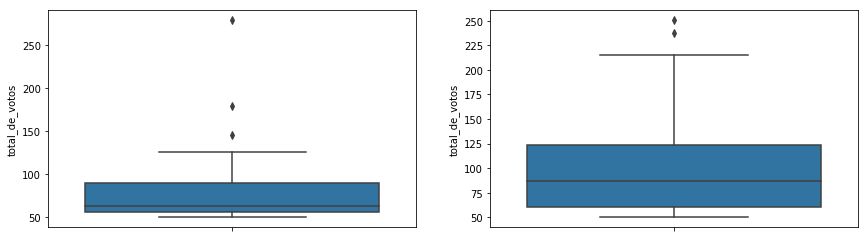

In [31]:
filmes_horror = filmes.query('Horror == 1')
filmes_aventura = filmes.query('Adventure == 1')

fig, ax =plt.subplots(1,2)
sns.boxplot(filmes_horror['total_de_votos'], ax=ax[0], orient='v')
sns.boxplot(filmes_aventura['total_de_votos'], ax=ax[1], orient='v')
fig.subplots_adjust(right=2)

Text(0, 0.5, 'Quantidade de votos')

<Figure size 432x288 with 0 Axes>

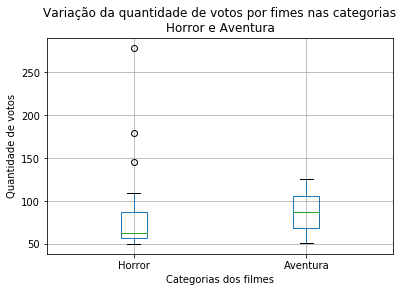

In [32]:
plt.figure()
filmes_horror.boxplot(column='total_de_votos', by=['Horror', 'Adventure'])
plt.title('Variação da quantidade de votos por fimes nas categorias\nHorror e Aventura')
plt.suptitle('')
plt.xlabel('Categorias dos filmes')
plt.xticks([1, 2], ['Horror', 'Aventura'])
plt.ylabel('Quantidade de votos')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

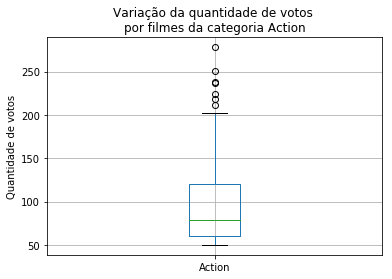

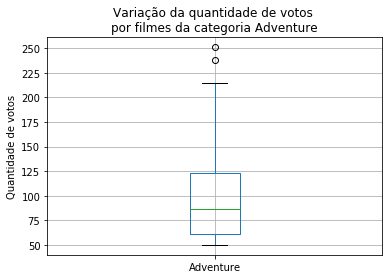

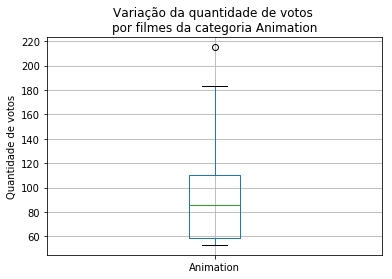

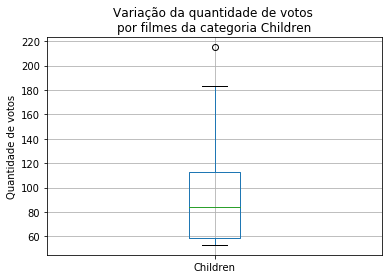

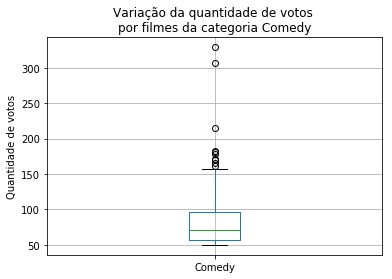

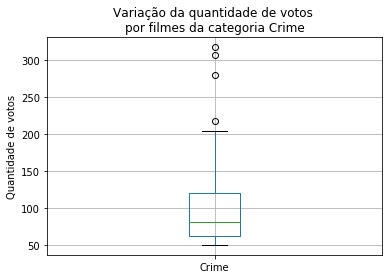

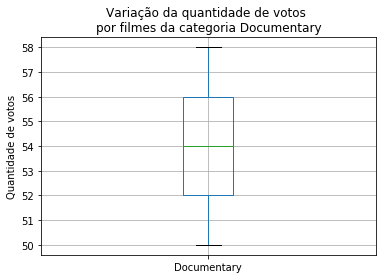

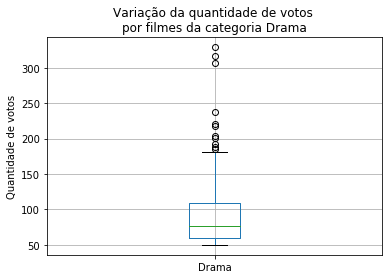

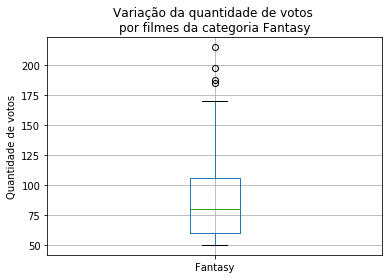

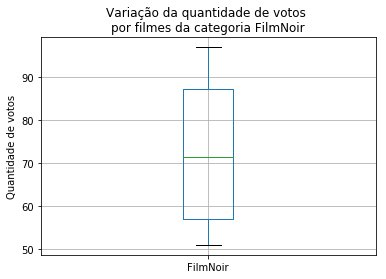

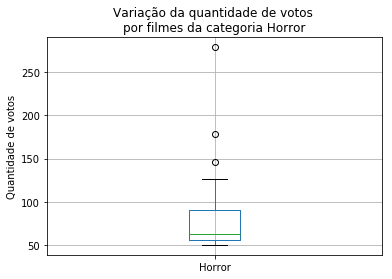

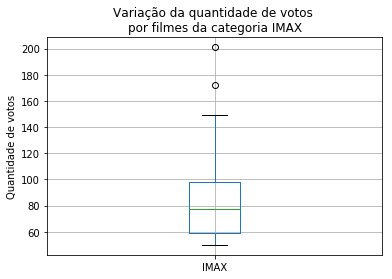

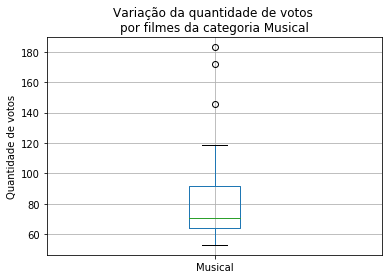

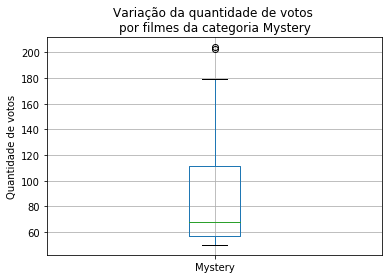

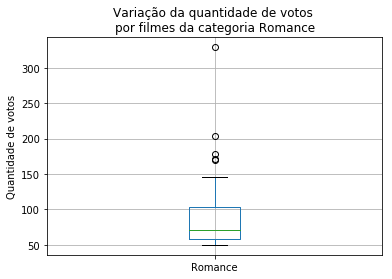

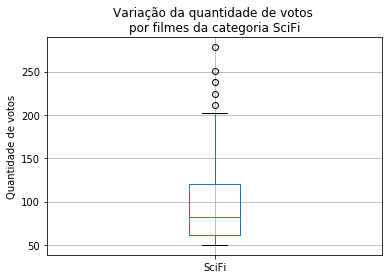

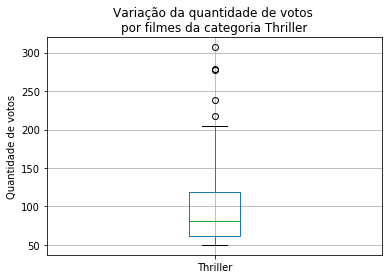

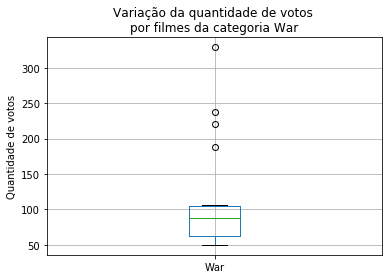

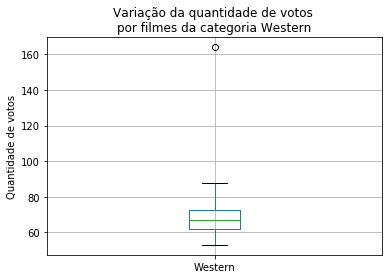

In [33]:
for genero in generos.columns:
    plt.figure()
    filmes.query(genero + '==1').boxplot(column='total_de_votos')
    plt.title('Variação da quantidade de votos \npor filmes da categoria ' + genero)
    plt.suptitle('')
    #plt.xlabel('Categorias dos filmes')
    plt.xticks([1], [genero])
    plt.ylabel('Quantidade de votos')
    

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

In [34]:
print('Avaliando filmes de horror\n------')
print(filmes_horror.nota_media.describe())
print('\n\nAvaliando filmes de aventura\n------')
print(filmes_aventura.nota_media.describe())
print('\n\nAvaliando filmes de aventura\n------')

Avaliando filmes de horror
------
count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota_media, dtype: float64


Avaliando filmes de aventura
------
count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota_media, dtype: float64


Avaliando filmes de aventura
------


In [35]:
popularidade_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

### Solução:
    
É importante salientear que até então estamos apenas com dados relacionados aos votos recebidos e não temos dados de e faturamentos.

Mas com base nos dados que temos, recomendaria criar um filme de aventura pois o gênero parece gerar maior engajamento do público (como visto no gráfico de "popularidade") e a maior quantidade de filmes de aventura lançados indica um mercado mais amplo e receptivo para essa categoria.

Ainda que menos filmes de horror signifique uma menor concorrência ao criar filmes de gênero, a baixa "popularidade" do gênero indica um público menos engajado e desencoraja investimento.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Quantidade de notas')

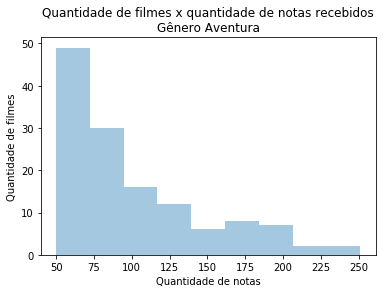

In [36]:
# solucao histograma de aventura
grafico = sns.distplot(filmes_aventura.total_de_votos, norm_hist=False, kde=False)
grafico.set_title('Quantidade de filmes x quantidade de notas recebidos\nGênero Aventura')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Quantidade de notas')


Text(0.5, 0, 'Quantidade de notas')

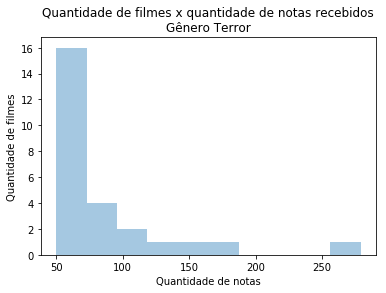

In [37]:
# solucao histograma de horror
grafico = sns.distplot(filmes_horror.total_de_votos, norm_hist=False, kde=False)
grafico.set_title('Quantidade de filmes x quantidade de notas recebidos\nGênero Terror')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Quantidade de notas')

In [38]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
stat, p = shapiro(filmes_horror.total_de_votos)
print('Filmes de horro p=%.6f' % (p))

stat, p = shapiro(filmes_aventura.total_de_votos)
print('Filmes de aventura p=%.6f' % (p))



Filmes de horro p=0.000002
Filmes de aventura p=0.000000


In [39]:
# solução com o teste desejado


### Solução (explique sua conclusão):



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0, 0.5, 'Nota média')

<Figure size 432x288 with 0 Axes>

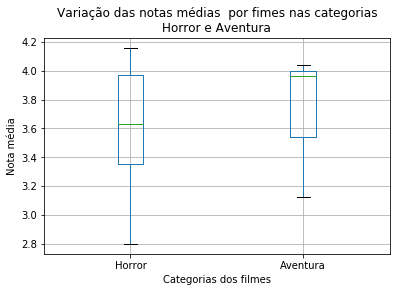

In [40]:
plt.figure()
filmes_horror.boxplot(column='nota_media', by=['Horror', 'Adventure'])
plt.title('Variação das notas médias  por fimes nas categorias\nHorror e Aventura')
plt.suptitle('')
plt.xlabel('Categorias dos filmes')
plt.xticks([1, 2], ['Horror', 'Aventura'])
plt.ylabel('Nota média')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Novamente recomendaria o gênero Aventura pois apesar de ter uma maior dispersão nos valores, a mediana dele está mais alta, indicando que esse gênero apresenta maior tendênca à notas mais altas


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Nota média')

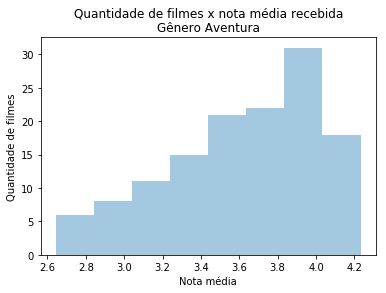

In [41]:
# solucao histograma de aventura
grafico = sns.distplot(filmes_aventura.nota_media, norm_hist=False, kde=False)
grafico.set_title('Quantidade de filmes x nota média recebida\nGênero Aventura')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Nota média')

Text(0.5, 0, 'Nota média')

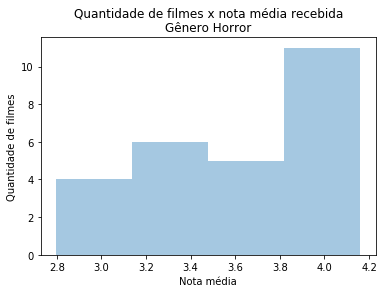

In [42]:
# solucao histograma de horror
# solucao histograma de aventura
grafico = sns.distplot(filmes_horror.nota_media, norm_hist=False, kde=False)
grafico.set_title('Quantidade de filmes x nota média recebida\nGênero Horror')
grafico.set_ylabel('Quantidade de filmes')
grafico.set_xlabel('Nota média')

In [43]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

stat, p = shapiro(filmes_horror.nota_media)
print('Filmes de horro p=%.6f' % (p))
print(stat)

stat, p = shapiro(filmes_aventura.nota_media)
print('Filmes de aventura p=%.6f' % (p))
print(stat)


Filmes de horro p=0.028727
0.9116240739822388
Filmes de aventura p=0.000179
0.9532154202461243


In [44]:
# solução com o teste desejado


*Até pensei em usar um t-test, mas a verdade é que eu não vejo utilidade em comparar essa duas amostras por se tratarem de gêneros diferentes*

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Sim... continuo recomendando criar um filme de aventura pois a pequena quantidade de dados sobre filmes de horror não foi gerou confiança estatística que sugerisse um melhor desempenho


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

As análises anteriores já sugerem que o gênero de Aventura ganha nos dois quesitos


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [45]:
votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [46]:
# solução: calculando os 2 generos mais votados
top2_generos = votos_por_genero.sort_values(ascending=False)[:2].index.tolist()
top2_generos

['Action', 'Drama']

In [47]:
[1,2]+[3,5]

[1, 2, 3, 5]

In [48]:
# solução: encontrando os top 5 filmes desses generos
print(top2_generos[0]+' == 1 or '+top2_generos[1]+' == 1')
top5_filmes = filmes.query(top2_generos[0]+' == 1 or '+top2_generos[1]+' == 1').nlargest(5, 'total_de_votos')
top5_filmes[['titulo', 'total_de_votos', ]+top2_generos]

Action == 1 or Drama == 1


,titulo,total_de_votos,Action,Drama
filmeId,,,,
356,Forrest Gump (1994),329.0,0,1
318,"Shawshank Redemption, The (1994)",317.0,0,1
296,Pulp Fiction (1994),307.0,0,1
2571,"Matrix, The (1999)",278.0,1,0
260,Star Wars: Episode IV - A New Hope (1977),251.0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

Comédia e Drama são os 2 gêneros com maior correlação com as notas médias dos filmes, sendo que o gênero Comédia apresenta uma correlação negativa (ou inversa).

Musicais e Documentários possuem a menor correlação com a nota média.

In [49]:
# solucao
filmes.corr()['nota_media'].sort_values()

Comedy              -0.256005
ano_de_lancamento   -0.159146
Action              -0.154089
SciFi               -0.136717
Adventure           -0.079985
Romance             -0.072002
Western             -0.059642
Horror              -0.033877
Children            -0.030360
Fantasy             -0.020986
Thriller            -0.016782
Musical             -0.008529
Documentary         -0.003486
Animation            0.043071
IMAX                 0.064931
FilmNoir             0.081766
War                  0.125615
Mystery              0.129914
Crime                0.190220
Drama                0.277662
total_de_votos       0.342584
nota_media           1.000000
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

- Comédia e Aventura são os gênero com maior correlação com o total de votos, sendo que Comédia apresenta uma correlação negatvia, ou seja, parece que o fato de um filme ser de comédia diminui a vontade dos espectadores de votarem.

- Mistério e Infantil são os gêneros com menor correlação com o total de votos

In [50]:
# solucao
filmes.corr()['total_de_votos'].sort_values()

Comedy              -0.128527
Western             -0.060789
Documentary         -0.055010
Romance             -0.045427
FilmNoir            -0.039408
Horror              -0.036132
ano_de_lancamento   -0.028709
Musical             -0.024741
IMAX                -0.016285
Fantasy             -0.009976
Mystery             -0.007051
Children             0.001764
Drama                0.018779
Animation            0.023442
SciFi                0.063802
Action               0.066239
Crime                0.079766
Thriller             0.085525
War                  0.087999
Adventure            0.104380
nota_media           0.342584
total_de_votos       1.000000
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [51]:
# solucao
nota_media_por_ano = data=filmes.groupby('ano_de_lancamento').mean()[['nota_media']]
nota_media_por_ano.reset_index(level=0, inplace=True)
nota_media_por_ano.head()


,ano_de_lancamento,nota_media
0,1937.0,3.616883
1,1939.0,3.880435
2,1940.0,3.616509
3,1941.0,4.043478
4,1942.0,4.240000


### LinePlot sem linha de tendência

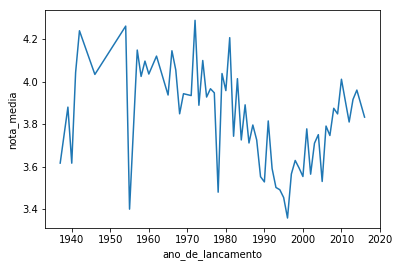

In [52]:
graf = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=nota_media_por_ano, ci=None)

### Lineplot com linha de tendência

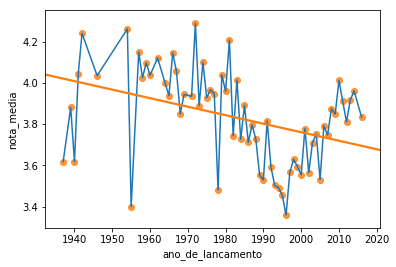

In [53]:
graf = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=nota_media_por_ano, ci=None)
graf = sns.regplot(x='ano_de_lancamento', y='nota_media', data=nota_media_por_ano, ci=None )


## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [54]:
# solução (código)
filmes.corr()['nota_media'][['ano_de_lancamento']]

ano_de_lancamento   -0.159146
Name: nota_media, dtype: float64

### Solução (explicação)

O calculo indica que 15% do valor da nota média pode ser explicado pelo ano em que o filme foi lançado.

Não temos uma causalidade de nota para ano, ou seja, não é o fato da nota média estar caindo que faz o ano aumentar.

Também não existe dados que suporte a afirmação de o ano esteja influenciando diretamente a nota média.

Poderíamos interpretar de que, com o passar do tempo, o público amadurece, torna-se mais crítico e as notas médias caem.. o que simplesmente os filmes estão perdendo a qualidade com o tempo.

Enfim... existe uma evidência numérica que aponta uma correlação de 15% mas não há como saber o que causa correlação.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

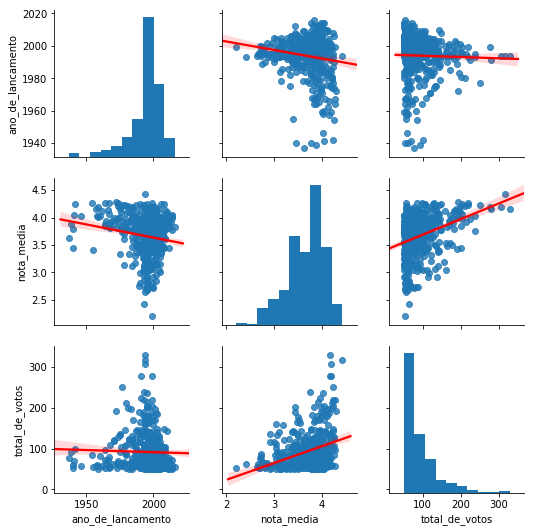

In [55]:
# solução
infos = filmes[['ano_de_lancamento','nota_media', 'total_de_votos']]
sns.pairplot(infos, kind='reg' , plot_kws={'line_kws':{'color':'red'}})

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [56]:
animacao_ou_nao = filmes[['ano_de_lancamento','nota_media', 'total_de_votos', 'Animation']]
animacao_ou_nao = animacao_ou_nao.replace({ 'Animation': {0:"outros", 1:"animação"} })
colunas = ['ano_de_lancamento','nota_media', 'total_de_votos']
animacao_ou_nao.head()

,ano_de_lancamento,nota_media,total_de_votos,Animation
filmeId,,,,
1,1995.0,3.920930,215.0,animação
2,1995.0,3.431818,110.0,outros
3,1995.0,3.259615,52.0,outros
6,1995.0,3.946078,102.0,outros
7,1995.0,3.185185,54.0,outros


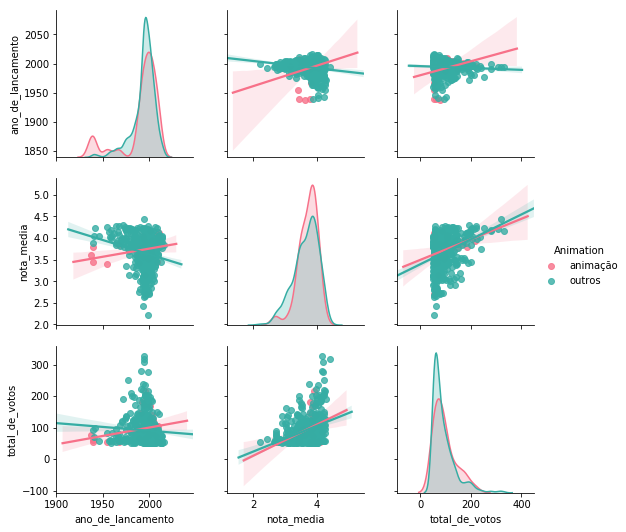

In [57]:
sns.pairplot(animacao_ou_nao, vars=colunas, palette='husl', kind='reg' , hue="Animation")

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

Parece que quanto mais recente o lançamento de filmesde animação, melhor são as notas médias, mas é uma correlação muito baixa

Já os outros filmes parecem ter uma tendência a piores notas quanto mais recente o lançamento. Isso quando olhados em um grupo, pois pode ser que dentro desse grupo existam outras categorias que seguem a mesma tendência das animações.

O total de votos segue o mesmo padrão.. quanto mais recente uma animação, mais engajamento (ou seja, total de votos) ela gera enquanto o grupo composto por todos os outros gêneros seguem uma tendência de queda (filmes novos recebem menos votos).

Como trabalhamos com poucos dados não podemos afirmar o porque essas tendências, mas podemos teorizar de que as animações estão melhorando a cada dia, e os diretores conseguem com maior facilidade criar filmes envolventes com essas tecnologias.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [58]:
# solução
filmes['idade_do_filme'] = 2019 - filmes['ano_de_lancamento']
filmes['votos_por_ano'] = filmes['total_de_votos'] /filmes['idade_do_filme']
filmes.sort_values(by='votos_por_ano', ascending=False).head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,idade_do_filme,votos_por_ano
filmeId,,,,,,,,,,,,,,,,,,,,,
122904,Deadpool (2016),2016.0,3.833333,54.0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,3.0,18.000000
79132,Inception (2010),2010.0,4.066434,143.0,1,0,0,0,0,1,...,1,0,1,0,1,1,0,0,9.0,15.888889
109487,Interstellar (2014),2014.0,3.993151,73.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,5.0,14.600000
2571,"Matrix, The (1999)",1999.0,4.192446,278.0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,20.0,13.900000
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,11.0,13.545455


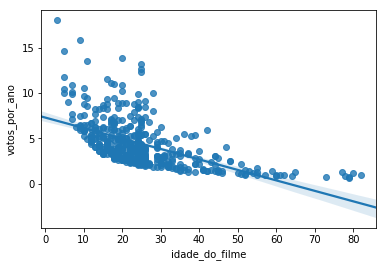

In [59]:
sns.regplot(data=filmes, x='idade_do_filme', y='votos_por_ano' )

Minha teoria era de que com o passar do tempo um filme iria receber mais votos por estar a mais tempo apto a receber os votos, mas o gráfico acima demonstra que existe a uma tendência de receberem mais votos os filmes mais recentes.

Levanto então uma hipótese de que o momento em que os usuários do site estão mais propensos a votar no filme é logo após o seu lançamento nos cinemas.